Contents

01. Importing Libraries
02. Importing Data Sets
03. Creating Visualizations Pt. 1
04. Sampling Data
05. Creating Visualizations Pt. 2
06. Exporting Visualizations

# 01. Importing Libraries

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Sets

In [3]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/06-2023 Instacart Basket Analysis'

In [4]:
# Import orders_products_all.pkl

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [7]:
# Display max rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
ords_prods_all.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# 03. Creating Visualizations Pt. 1

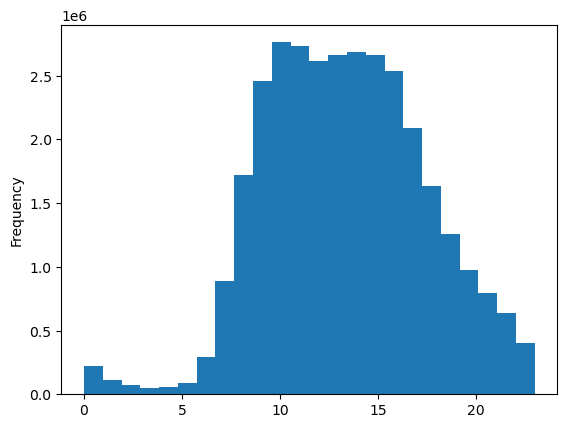

In [12]:
# Step 3 - Creating a histogram of the order_hour_of_day column

hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that the majority of orders happen between 10am and 3pm/4pm.

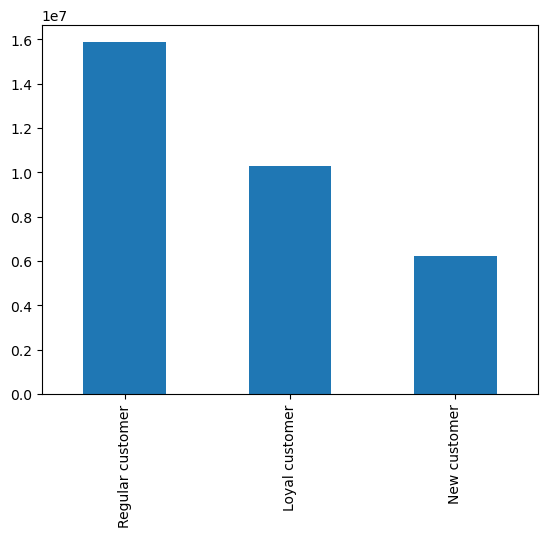

In [14]:
# Step 4 - Creating a bar chart of the loyalty_flag column

bar_1 = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

# 04. Sampling Data

In [15]:
# We need to sample our data to create line charts. We will create a 70/30 sample of our data. 
# First, we will set the seed to 4

np.random.seed(4)

In [16]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big

big = ords_prods_all[dev]

In [18]:
# Store 30% of the sample in the dataframe small

small = ords_prods_all[~dev]

In [19]:
# Let's check to make sure everything worked as planned. First, check the length of our dataframe

len(ords_prods_all)

32404859

In [20]:
# Then check the added lengths of the big and small dataframes

len(big) + len(small)

32404859

# 05. Creating Visualizations Pt. 2

In [21]:
# We're going to create a dataframe of just the order_hour_of_day and prices columns for our first line chart

df_2 = small[['order_hour_of_day', 'prices']]

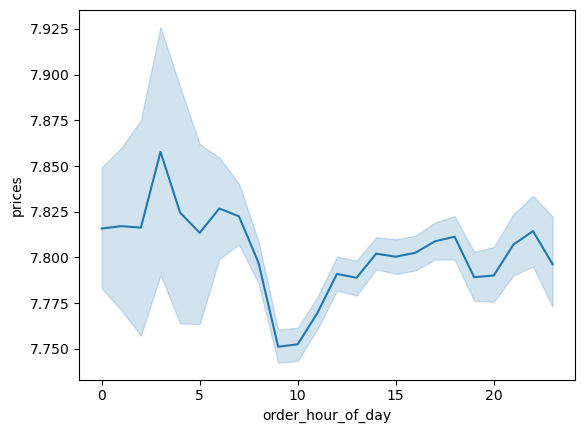

In [22]:
# Step 5 - Create a line chart of prices vs order_hour_of_day

line_1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [23]:
# Step 6 - Creating a line chart of age vs number of dependants
# First, we make a new dataframe of just those columns

df_3 = small[['Age', 'num_of_dependants']]

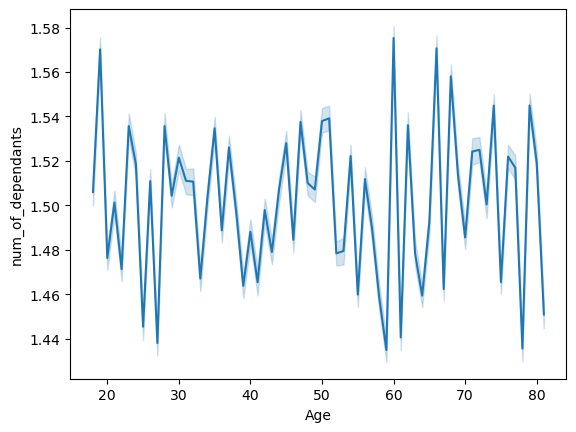

In [24]:
# Create the line chat

line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'num_of_dependants')

It looks as if there is no connection between family situation (number of dependants) and age as the line chart shows no obvious trend.

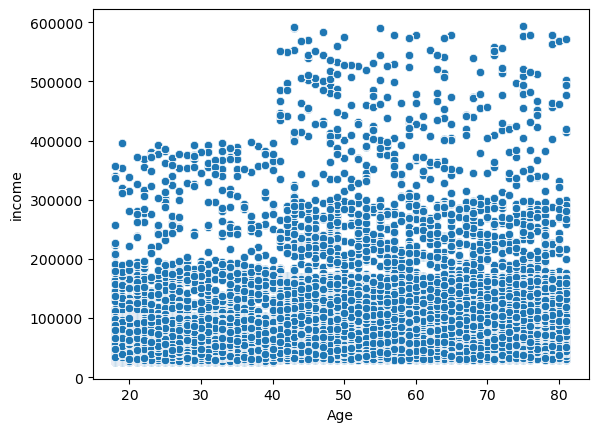

In [27]:
# Step 7 - Creating a scatterplot of age vs income

scatter_1 = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_all)

Based on our scatterplot, it looks like income increases with age, though not drastically. The average income is $200,000 and below across all age groups. It does however, increase around 40 years of age.

# 06. Exporting Visualizations

In [29]:
# Exporting all our visualizations to the Visualizations folder

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'), bbox_inches = "tight")
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_vs_price.png'))
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_vs_dependants.png'))
scatter_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_vs_income.png'))